<a href="https://colab.research.google.com/github/gackouhamady/MLSD-25-26-Courses/blob/main/01-Data-Engineering/BI/notebooks/Exploration_des_donn%C3%A9es_Part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis (Part II/II)**



In [ ]:
if (!require(vioplot)) install.packages('vioplot')
if (!require(corrplot)) install.packages('corrplot')
if (!require(gmodels)) install.packages('gmodels')
if (!require(matrixStats)) install.packages('matrixStats')

In [ ]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(vioplot)
library(corrplot)
library(gmodels)
library(matrixStats)

# Estimates of location

In [ ]:
# Load the 'state' data
# - population and murder rate by state
state <- read.csv(file.path('sample_data', 'state.csv'))
print(paste(c("Data dimensions:", paste(dim(state), collapse=", "))))
head(state)

[1] "Data dimensions:" "50, 4"           


,State,Population,Murder.Rate,Abbreviation
,<chr>,<int>,<dbl>,<chr>
1,Alabama,4779736,5.7,AL
2,Alaska,710231,5.6,AK
3,Arizona,6392017,4.7,AZ
4,Arkansas,2915918,5.6,AR
5,California,37253956,4.4,CA
6,Colorado,5029196,2.8,CO


### *Mean and median*

$\mathit{mean}=\bar{x}=\frac{\sum_{i=1}^n x_i}{n}$ \\
$\mathit{Trimmed~mean}=\bar{x}=\frac{\sum_{i=p+1}^{n-p}}{n-2p}$ \\


In [ ]:
# Usually mean
mean(state[['Population']])
# Mean with a % of exterme values trimmed
# - eliminate the influence of extreme values -
mean(state[['Population']], trim=0.1)
# Median
median(state[['Population']])


[1] 6162876

[1] 4783697

[1] 4436370

### *Weighted mean*

$\mathit{Weighted~mean}=\bar{x}_w=\frac{\sum_{i=1}^{n}w_ix_i}{\sum_{i=1}^{n}w_i}$

In [ ]:
# Mean and median of murder rates weighted by the population
weighted.mean(state[['Murder.Rate']], w=state[['Population']])
weightedMedian(state[['Murder.Rate']], w=state[['Population']])

# NB - Median: robust estimate -

[1] 4.445834

[1] 4.4

# Data variability

$\mathit{Variance} = s^2 = \frac{∑_{i=1}^n(x_i-\bar{x})^2}{n-1}$ \\
$\mathit{Standard~~deviation}=s=\sqrt{\mathit{Variance}}$


In [ ]:
# Standard deviation
# - same scale as the data -
sd(state[['Population']])

[1] 6848235

IQR = The difference between the 75th percentile and the 25th percentile

In [ ]:
# Interquantile range
IQR(state[['Population']])

[1] 4847308

$\mathit{Mean~absolute~deviation} = \frac{∑_{i=1}^n \vert x_i-\bar{x} \vert}{n}$

In [ ]:
# Mean absolute deviation
mad(state[['Population']])

# NB: Median absolute deviation is more robust

[1] 3849870

$\mathit{Median~absolute~deviation} = \mathit{Median}(\vert x_1-m \vert, \vert x_2-m \vert,..., \vert x_n-m \vert)$

# Data distribution
### *Percentiles and Boxplot*

In [ ]:
# Percentile: the value such that P% of the values are less or equal
names(quantile(state[['Murder.Rate']], p=c(.05, .25, .5, .75, .95)))

[1] "5%"  "25%" "50%" "75%" "95%"

In [ ]:
as.data.frame(quantile(state[['Murder.Rate']], p=c(.05, .25, .5, .75, .95)))

,"quantile(state[[""Murder.Rate""]], p = c(0.05, 0.25, 0.5, 0.75, 0.95))"
,<dbl>
5%,1.600
25%,2.425
50%,4.000
75%,5.550
95%,6.510


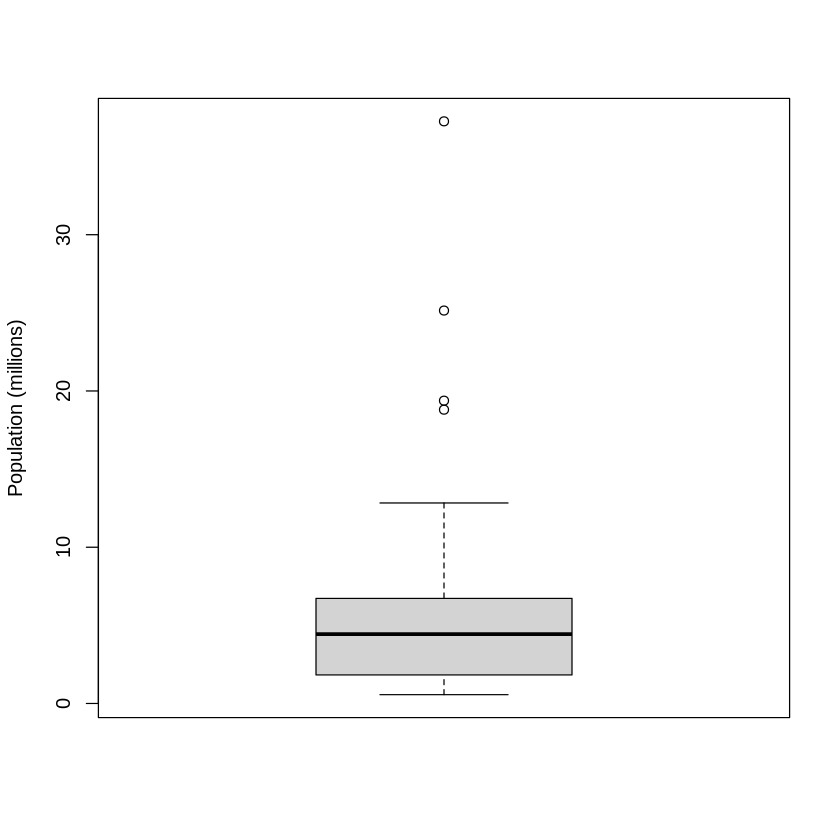

In [ ]:
boxplot(state[['Population']]/1000000, ylab='Population (millions)')

# Max whiskers position: 1.5 x IQR

### *Frequency tables and histograms*

In [ ]:
# (1) Divide a varible into equally spaced segments
breaks <- seq(from=min(state[['Population']]),
              to=max(state[['Population']]), length=11)
breaks

[1]   563626  4232659  7901692 11570725 15239758 18908791 22577824 26246857
 [9] 29915890 33584923 37253956

In [ ]:
pop_freq <- cut(state[['Population']], breaks=breaks,
                right=TRUE, include.lowest=TRUE)
as.data.frame(pop_freq)


In [ ]:
# (2) Count the number of values within each segment
table(pop_freq)

pop_freq
[5.64e+05,4.23e+06]  (4.23e+06,7.9e+06]  (7.9e+06,1.16e+07] (1.16e+07,1.52e+07] 
                 24                  14                   6                   2 
(1.52e+07,1.89e+07] (1.89e+07,2.26e+07] (2.26e+07,2.62e+07] (2.62e+07,2.99e+07] 
                  1                   1                   1                   0 
(2.99e+07,3.36e+07] (3.36e+07,3.73e+07] 
                  0                   1 

In [ ]:
table(c('b','b','b','c','d','g','h','e','h','h','h'))


b c d e g h 
3 1 1 1 1 4 

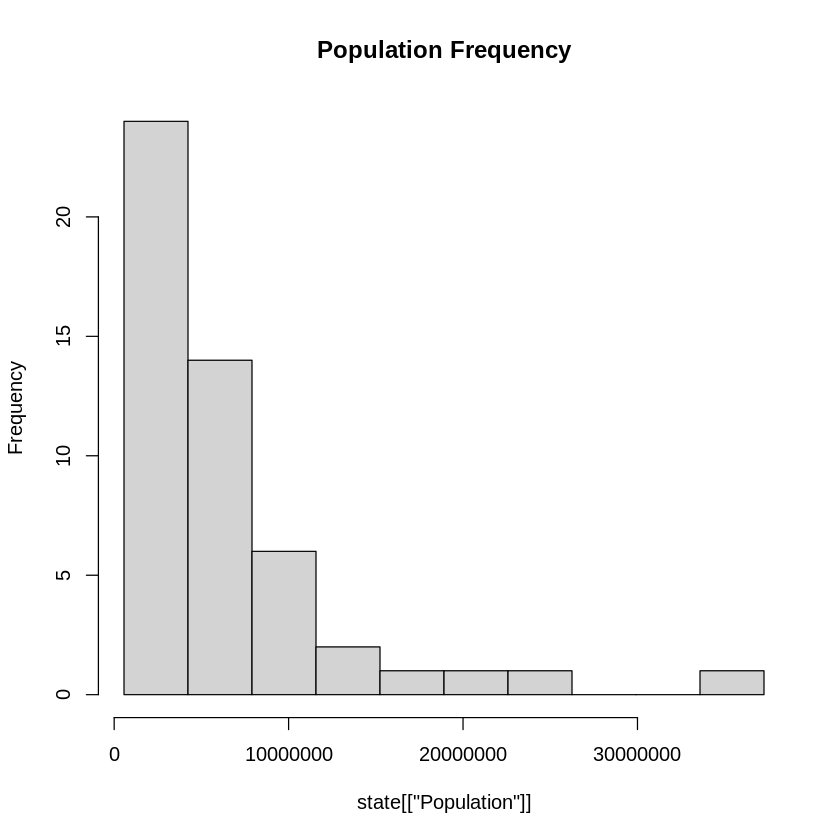

In [ ]:
options(scipen=5)
hist(state[['Population']], breaks=breaks, main = 'Population Frequency')

# NB: hist plots the counts

### *Density plots and estimates*
Density: computed from the data throug *through* a *kernel density estimate*.

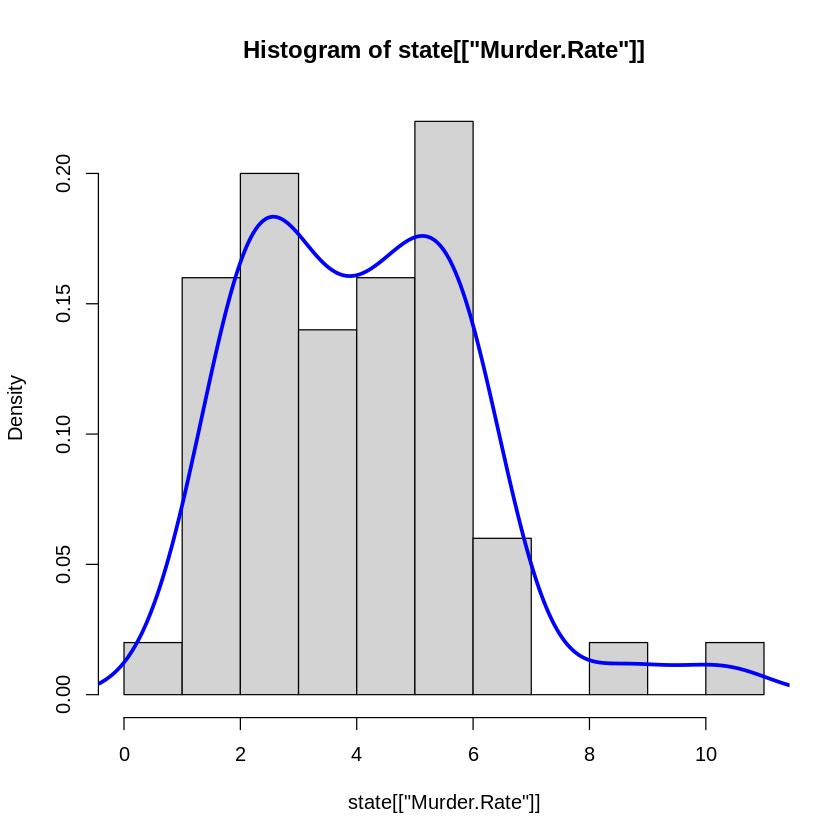

In [ ]:
hist(state[['Murder.Rate']], freq=FALSE )
lines(density(state[['Murder.Rate']]), lwd=3, col='blue')

# NB:
# - Density plot corresponds to propotion, not counts
# - Total area under the density curve is 1
# - Proportion of distribution btw 2 points = area under the curve btw 2 points

# Binary and Categorical Data

In [ ]:
# Load dfw_airline
# - percentage of delays by cause at Dallas/Fort Worth Airport
dfw <- read.csv(file.path('sample_data', 'dfw_airline.csv'))
dim(dfw); head(dfw)

[1] 1 5

,Carrier,ATC,Weather,Security,Inbound
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,64263.16,84856.5,11235.42,343.15,118427.8


### *Barplot*

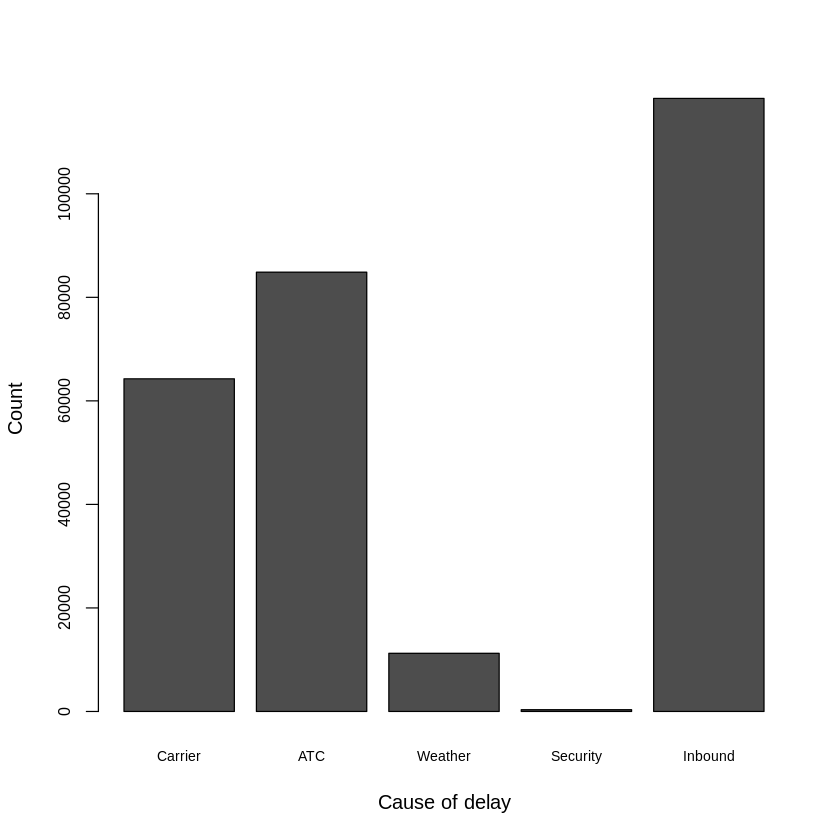

In [ ]:
barplot(height=as.matrix(dfw), cex.axis=0.8, cex.names=0.7,
        xlab='Cause of delay', ylab='Count')

# NB:
# - x-axis represent different categories of a factor variable
# - Inbound is the mode: the value that appears lost often in the data

# Correlation
*(bivariate analysis)*

In [ ]:
# Load a new dataset
sp500_px <- read.csv(file.path('sample_data', 'sp500_data.csv'), row.names=1)
dim(sp500_px); head(sp500_px)

[1] 5647  517

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,⋯,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1993-01-29,0,0.06012444,-0.02209982,0,0,0.01889746,0.007368072,0.09216520,0.25914009,-0.007105265,⋯,0,0,0.34716010,0,0.04167,0.00000000,0.015563612,1.75,0.1250,0
1993-02-01,0,-0.18038896,0.02762115,0,0,0.01888884,0.018424887,0.11520651,-0.10077451,0.063892875,⋯,0,0,-0.23144007,0,0.00000,-0.01040992,0.007781806,1.25,0.1250,0
1993-02-02,0,-0.12025659,0.03589987,0,0,-0.07557260,0.029481717,-0.02304130,0.02879553,-0.014192369,⋯,0,0,-0.11572003,0,0.00000,0.00000000,-0.007791776,-0.25,0.0000,0
1993-02-03,0,0.06012420,-0.02485703,0,0,-0.15112797,0.003688752,-0.25345431,-0.04319002,-0.007105265,⋯,0,0,-0.08679003,0,0.04167,-0.04166996,-0.038918978,-0.50,0.0625,0
1993-02-04,0,-0.36076975,-0.06075672,0,0,0.11335029,-0.022113634,0.06986180,0.00000000,-0.007096184,⋯,0,0,0.14465004,0,-0.04166,-0.03126000,-0.046710803,0.00,0.0625,0
1993-02-05,0,0.03005777,0.09389247,0,0,0.09445283,-0.047906563,0.04657454,0.17276006,-0.021297631,⋯,0,0,-0.33269069,0,-0.08333,-0.01041000,0.015573582,-0.75,-0.0625,0


In [ ]:
# Load a new dataset
sp500_sym <- read.csv(file.path('sample_data', 'sp500_sectors.csv'), stringsAsFactors = FALSE)
dim(sp500_sym); head(sp500_sym)

[1] 517   4

,sector,sector_label,sub_sector,symbol
,<chr>,<chr>,<chr>,<chr>
1,information_technology,Technology,data_processing_&_outsourced_services,ADS
2,information_technology,Technology,systems_software,CA
3,information_technology,Technology,systems_software,MSFT
4,information_technology,Technology,systems_software,RHT
5,information_technology,Technology,it_consulting_&_services,CTSH
6,information_technology,Technology,it_consulting_&_services,CSC


### *Correlation matrix*

In [ ]:
# Get the symbols associated with 'telecommunications_services'
my_symb <- sp500_sym[sp500_sym$sector == 'telecommunications_services', 'symbol']
my_symb
# Get values for theses columns in the other datatable
telecom <- sp500_px[, my_symb]
# Filter by date using the rownames
telecom <- telecom[row.names(telecom) > '2012-07-01',]
row.names(sp500_px)

[1] "T"    "CTL"  "FTR"  "VZ"   "LVLT"

[1] "1993-01-29" "1993-02-01" "1993-02-02" "1993-02-03" "1993-02-04"
   [6] "1993-02-05" "1993-02-08" "1993-02-09" "1993-02-10" "1993-02-11"
  [11] "1993-02-12" "1993-02-16" "1993-02-17" "1993-02-18" "1993-02-19"
  [16] "1993-02-22" "1993-02-23" "1993-02-24" "1993-02-25" "1993-02-26"
  [21] "1993-03-01" "1993-03-02" "1993-03-03" "1993-03-04" "1993-03-05"
  [26] "1993-03-08" "1993-03-09" "1993-03-10" "1993-03-11" "1993-03-12"
  [31] "1993-03-15" "1993-03-16" "1993-03-17" "1993-03-18" "1993-03-19"
  [36] "1993-03-22" "1993-03-23" "1993-03-24" "1993-03-25" "1993-03-26"
  [41] "1993-03-29" "1993-03-30" "1993-03-31" "1993-04-01" "1993-04-02"
  [46] "1993-04-05" "1993-04-06" "1993-04-07" "1993-04-08" "1993-04-12"
  [51] "1993-04-13" "1993-04-14" "1993-04-15" "1993-04-16" "1993-04-19"
  [56] "1993-04-20" "1993-04-21" "1993-04-22" "1993-04-23" "1993-04-26"
  [61] "1993-04-27" "1993-04-28" "1993-04-29" "1993-04-30" "1993-05-03"
  [66] "1993-05-04" "1993-05-05" "1993-05-06" "1993-05-07" "1993-05-10"
  [71] "1993-05-11" "1993-05-12" "1993-05-13" "1993-05-14" "1993-05-17"
  [76] "1993-05-18" "1993-05-19" "1993-05-20" "1993-05-21" "1993-05-24"
  [81] "1993-05-25" "1993-05-26" "1993-05-27" "1993-05-28" "1993-06-01"
  [86] "1993-06-02" "1993-06-03" "1993-06-04" "1993-06-07" "1993-06-08"
  [91] "1993-06-09" "1993-06-10" "1993-06-11" "1993-06-14" "1993-06-15"
  [96] "1993-06-16" "1993-06-17" "1993-06-18" "1993-06-21" "1993-06-22"
 [101] "1993-06-23" "1993-06-24" "1993-06-25" "1993-06-28" "1993-06-29"
 [106] "1993-06-30" "1993-07-01" "1993-07-02" "1993-07-06" "1993-07-07"
 [111] "1993-07-08" "1993-07-09" "1993-07-12" "1993-07-13" "1993-07-14"
 [116] "1993-07-15" "1993-07-16" "1993-07-19" "1993-07-20" "1993-07-21"
 [121] "1993-07-22" "1993-07-23" "1993-07-26" "1993-07-27" "1993-07-28"
 [126] "1993-07-29" "1993-07-30" "1993-08-02" "1993-08-03" "1993-08-04"
 [131] "1993-08-05" "1993-08-06" "1993-08-09" "1993-08-10" "1993-08-11"
 [136] "1993-08-12" "1993-08-13" "1993-08-16" "1993-08-17" "1993-08-18"
 [141] "1993-08-19" "1993-08-20" "1993-08-23" "1993-08-24" "1993-08-25"
 [146] "1993-08-26" "1993-08-27" "1993-08-30" "1993-08-31" "1993-09-01"
 [151] "1993-09-02" "1993-09-03" "1993-09-07" "1993-09-08" "1993-09-09"
 [156] "1993-09-10" "1993-09-13" "1993-09-14" "1993-09-15" "1993-09-16"
 [161] "1993-09-17" "1993-09-20" "1993-09-21" "1993-09-22" "1993-09-23"
 [166] "1993-09-24" "1993-09-27" "1993-09-28" "1993-09-29" "1993-09-30"
 [171] "1993-10-01" "1993-10-04" "1993-10-05" "1993-10-06" "1993-10-07"
 [176] "1993-10-08" "1993-10-11" "1993-10-12" "1993-10-13" "1993-10-14"
 [181] "1993-10-15" "1993-10-18" "1993-10-19" "1993-10-20" "1993-10-21"
 [186] "1993-10-22" "1993-10-25" "1993-10-26" "1993-10-27" "1993-10-28"
 [191] "1993-10-29" "1993-11-01" "1993-11-02" "1993-11-03" "1993-11-04"
 [196] "1993-11-05" "1993-11-08" "1993-11-09" "1993-11-10" "1993-11-11"
 [201] "1993-11-12" "1993-11-15" "1993-11-16" "1993-11-17" "1993-11-18"
 [206] "1993-11-19" "1993-11-22" "1993-11-23" "1993-11-24" "1993-11-26"
 [211] "1993-11-29" "1993-11-30" "1993-12-01" "1993-12-02" "1993-12-03"
 [216] "1993-12-06" "1993-12-07" "1993-12-08" "1993-12-09" "1993-12-10"
 [221] "1993-12-13" "1993-12-14" "1993-12-15" "1993-12-16" "1993-12-17"
 [226] "1993-12-20" "1993-12-21" "1993-12-22" "1993-12-23" "1993-12-27"
 [231] "1993-12-28" "1993-12-29" "1993-12-30" "1993-12-31" "1994-01-03"
 [236] "1994-01-04" "1994-01-05" "1994-01-06" "1994-01-07" "1994-01-10"
 [241] "1994-01-11" "1994-01-12" "1994-01-13" "1994-01-14" "1994-01-17"
 [246] "1994-01-18" "1994-01-19" "1994-01-20" "1994-01-21" "1994-01-24"
 [251] "1994-01-25" "1994-01-26" "1994-01-27" "1994-01-28" "1994-01-31"
 [256] "1994-02-01" "1994-02-02" "1994-02-03" "1994-02-04" "1994-02-07"
 [261] "1994-02-08" "1994-02-09" "1994-02-10" "1994-02-11" "1994-02-14"
 [266] "1994-02-15" "1994-02-16" "1994-02-17" "1994-02-18" "1994-02-22"
 [271] "1994-02-23" "1994-02-24" "1994-02-25" "1994-02-28" "1994-03-01"
 [276] "1994-03-02" "1994-03-03" "1994-03-0

In [ ]:
colnames(sp500_px)

[1] "ADS"   "CA"    "MSFT"  "RHT"   "CTSH"  "CSC"   "EMC"   "IBM"   "XRX"  
 [10] "ALTR"  "ADI"   "AVGO"  "BRCM"  "FSLR"  "INTC"  "LLTC"  "MCHP"  "MU"   
 [19] "NVDA"  "QRVO"  "QCOM"  "SWKS"  "TXN"   "XLNX"  "AAPL"  "HPQ"   "EA"   
 [28] "SNDK"  "STX"   "WDC"   "TEL"   "HRS"   "MSI"   "ACN"   "AMAT"  "KLAC" 
 [37] "LRCX"  "ADBE"  "ADSK"  "ORCL"  "SYMC"  "TDC"   "AKAM"  "ADP"   "CTXS" 
 [46] "EBAY"  "EQIX"  "FB"    "FIS"   "FISV"  "GOOGL" "GOOG"  "INTU"  "MA"   
 [55] "NTAP"  "NFLX"  "PAYX"  "CRM"   "TSS"   "VRSN"  "V"     "WU"    "YHOO" 
 [64] "CSCO"  "FFIV"  "JNPR"  "PBI"   "RHI"   "GLW"   "ADT"   "FLR"   "NLSN" 
 [73] "DNB"   "IRM"   "BA"    "FLIR"  "GD"    "LMT"   "NOC"   "RTN"   "CSX"  
 [82] "KSU"   "NSC"   "UNP"   "AAL"   "DAL"   "LUV"   "AME"   "APH"   "JBHT" 
 [91] "GWW"   "CTAS"  "CMI"   "DHR"   "DOV"   "FLS"   "ITW"   "JOY"   "WM"   
[100] "MMM"   "ETN"   "EMR"   "GE"    "HON"   "IR"    "JEC"   "LLL"   "LEG"  
[109] "PLL"   "PH"    "PNR"   "PCP"   "PWR"   "RSG"   "ROK"   "COL"   "ROP"  
[118] "R"     "SRCL"  "TXT"   "TYC"   "UTX"   "XYL"   "CHRW"  "EXPD"  "FDX"  
[127] "UPS"   "CAT"   "DE"    "PCAR"  "ALLE"  "FAST"  "MAS"   "URI"   "KMI"  
[136] "MPC"   "PSX"   "SE"    "TSO"   "VLO"   "DO"    "ESV"   "HP"    "RIG"  
[145] "APC"   "APA"   "COG"   "XEC"   "COP"   "DVN"   "EOG"   "EQT"   "MRO"  
[154] "NFX"   "NBL"   "OXY"   "OKE"   "PXD"   "RRC"   "SWN"   "WMB"   "CPGX" 
[163] "CNX"   "CHK"   "CVX"   "XOM"   "HES"   "MUR"   "BHI"   "CAM"   "FTI"  
[172] "HAL"   "NOV"   "SLB"   "HAS"   "MAT"   "RCL"   "GRMN"  "HAR"   "CVC"  
[181] "CBS"   "CMCSA" "DTV"   "DISCA" "DISCK" "SNI"   "TWX"   "TWC"   "VIAB" 
[190] "DIS"   "CCL"   "EXPE"  "MAR"   "PCLN"  "HOT"   "WYN"   "BWA"   "DLPH" 
[199] "JCI"   "BBY"   "GME"   "NWSA"  "TGNA"  "FOXA"  "MHK"   "DG"    "DLTR" 
[208] "KSS"   "TGT"   "HOG"   "HD"    "LOW"   "M"     "JWN"   "NWL"   "DHI"  
[217] "LEN"   "PHM"   "COH"   "FOSL"  "HBI"   "KORS"  "NKE"   "RL"    "PVH"  
[226] "TIF"   "UA"    "VFC"   "GT"    "AN"    "AZO"   "BBBY"  "KMX"   "GPC"  
[235] "ORLY"  "SPLS"  "GPS"   "LB"    "ROST"  "TJX"   "URBN"  "SNA"   "SWK"  
[244] "WHR"   "WYNN"  "AAP"   "TSCO"  "F"     "GM"    "IPG"   "OMC"   "AMZN" 
[253] "TRIP"  "CMG"   "DRI"   "MCD"   "SBUX"  "YUM"   "GAS"   "AEE"   "CNP"  
[262] "CMS"   "DTE"   "ES"    "EXC"   "NEE"   "NI"    "PCG"   "PNW"   "SCG"  
[271] "SRE"   "XEL"   "AES"   "NRG"   "AEP"   "ED"    "D"     "DUK"   "EIX"  
[280] "ETR"   "FE"    "POM"   "PPL"   "PEG"   "SO"    "TE"    "WEC"   "NUE"  
[289] "NEM"   "AA"    "BLL"   "OI"    "IP"    "CF"    "MON"   "MOS"   "AVY"  
[298] "WRK"   "SEE"   "FCX"   "MLM"   "VMC"   "APD"   "ARG"   "PX"    "ECL"  
[307] "IFF"   "SHW"   "DOW"   "DD"    "EMN"   "FMC"   "LYB"   "PPG"   "SIAL" 
[316] "XLI"   "QQQ"   "SPY"   "DIA"   "GLD"   "VXX"   "USO"   "IWM"   "XLE"  
[325] "XLY"   "XLU"   "XLB"   "XTL"   "XLV"   "XLP"   "XLF"   "XLK"   "T"    
[334] "CTL"   "FTR"   "VZ"    "LVLT"  "CLX"   "CL"    "KMB"   "BF.B"  "STZ"  
[343] "CPB"   "CAG"   "GIS"   "HRL"   "K"     "GMCR"  "MKC"   "MJN"   "MDLZ" 
[352] "SJM"   "HSY"   "TSN"   "MO"    "PM"    "RAI"   "CVS"   "WBA"   "ADM"  
[361] "SYY"   "COST"  "WMT"   "EL"    "PG"    "TAP"   "KO"    "CCE"   "DPS"  
[370] "MNST"  "PEP"   "KR"    "WFM"   "AMG"   "BLK"   "BEN"   "IVZ"   "LM"   
[379] "NTRS"  "AXP"   "HRB"   "COF"   "DFS"   "NAVI"  "HCBK"  "PBCT"  "SCHW" 
[388] "ETFC"  "GS"    "MS"    "O"     "SLG"   "MAC"   "AMT"   "CBG"   "AMP"  
[397] "CME"   "EFX"   "ICE"   "MHFI"  "MCO"   "NDAQ"  "PFG"   "PLD"   "PRU"  
[406] "RF"    "STT"   "TROW"  "UNM"   "VTR"   "AFL"   "GNW"   "MET"   "TMK"  
[415] "ACE"   "ALL"   "AIG"   "CB"    "CINF"  "HIG"   "PGR"   "TRV"   "XL"   
[424] "AVB"   "ESS"   "BAC"   "BK"    "BBT"   "C"     "CMA"   "FITB"  "HBAN" 
[433] "JPM"   "KEY"   "MTB"   "PNC"   "STI"   "USB"   "WFC"   "ZION"  "AIV"  
[442] "BXP"   "CCI"   "EQR"   "GGP"   "HCP"   "HCN"   "HST"   "KIM"   "PCL"  
[451] "PSA"   "SPG"   "VNO"   "WY"    "BRK.B" "LUK"   "L"     "AON"   "MMC"  
[460] "AIZ"   "LNC"   "D

,T,CTL,FTR,VZ,LVLT
T,1.0000000,0.4746828,0.3277670,0.6776125,0.2786259
CTL,0.4746828,1.0000000,0.4197567,0.4166045,0.2866655
FTR,0.3277670,0.4197567,1.0000000,0.2873864,0.2600678
VZ,0.6776125,0.4166045,0.2873864,1.0000000,0.2421985
LVLT,0.2786259,0.2866655,0.2600678,0.2421985,1.0000000


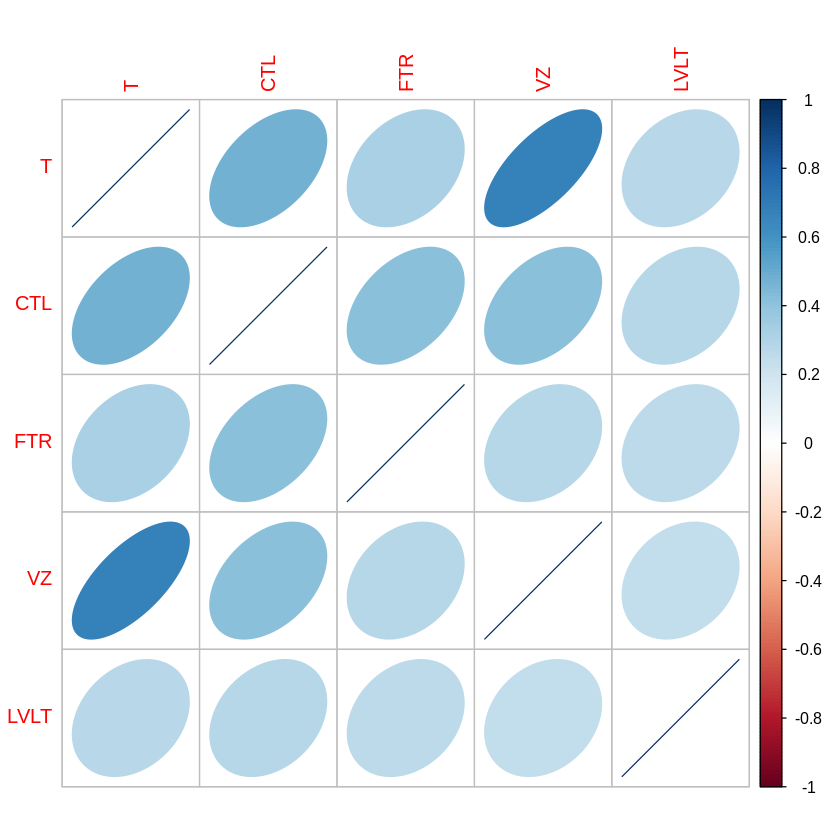

In [ ]:
# Compute the correlations
telecom_cor <- cor(telecom)
telecom_cor
corrplot(telecom_cor, method='ellipse')

# NB:
# The correlation matrix shows the correlation between the daily returns for
# telecommunication stocks from July 2012 through June 2015
# - Verizon (VZ)  and ATT (T) have the highest correlation
# - LVTL (an infrastructure company) has the lowest correlation with the others

$\mathit{Pearson's~~correlation~~coefficient}=\frac{\sum_{i-1}^n(x_i-\bar{x})(y_i-\bar{y})}{(n-1)s_xs_y}$<br>
$\underline{Caution}$: $r$ is sensitive to outliers in the data!

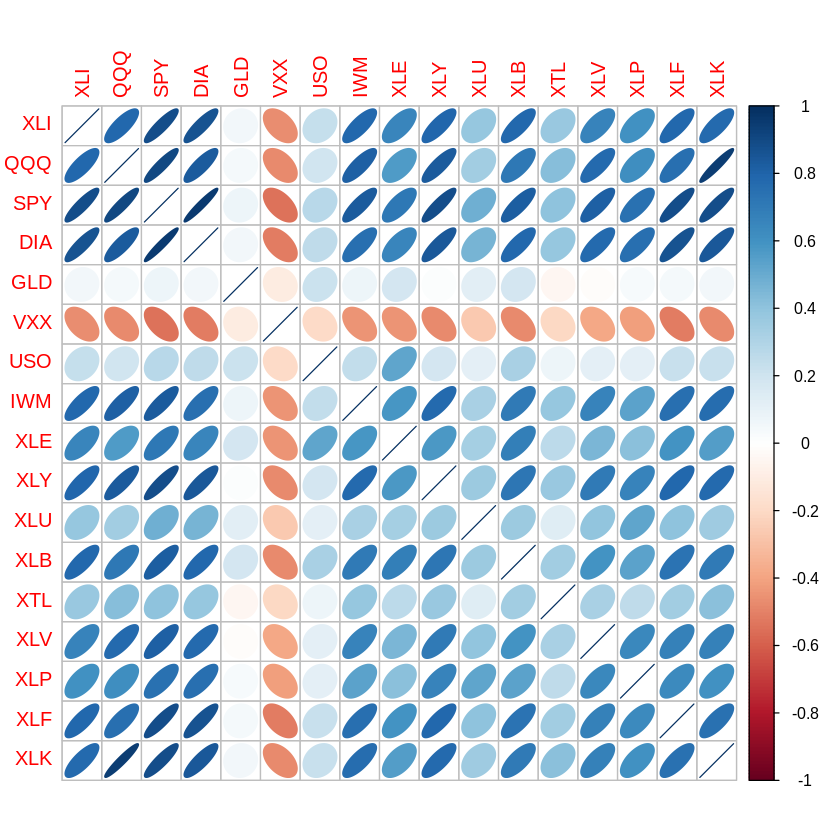

In [ ]:
# We focus on funds traded on major exchange-traded funds (sector == 'etf')
etfs <- sp500_px[row.names(sp500_px) > '2012-07-01',
                 sp500_sym[sp500_sym$sector == 'etf', 'symbol']]
corrplot(cor(etfs), method='ellipse')

# NB:
# - the ETFs for the S&P 500 (SPY) and the Dow Jones Index (IDA) have a high correlation
# - idem for QQQ and XLK, composed mostly of technology companies
# - ellipes towards the top right indicate positive correlation
# - ellipes shading and shape indicate the strengh of the association
# - Robust estimation: possible with covRob R package

### *Scatterplot*

[1] 754   5

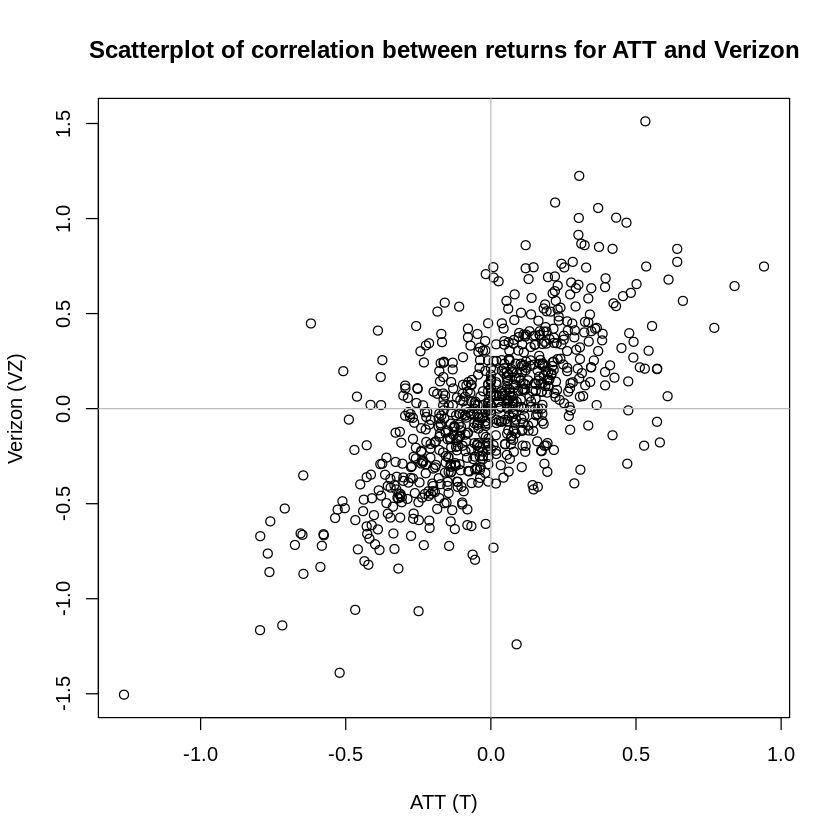

In [ ]:
# We can visualize the behavior of two variables, for instance,
# VZ and T for which the daily returns have a high correlation
# coefficient.

# plot(telecom$T, telecom$VZ, xlab='T', ylab='VZ', cex=.8)
plot(telecom$T, telecom$VZ, xlab='ATT (T)', ylab='Verizon (VZ)',
main = 'Scatterplot of correlation between returns for ATT and Verizon')
abline(h=0, v=0, col='grey')
dim(telecom)

# NB:
# - we can see that the stocks goes up or down in tandem
# - for few days, one stock goes down significantly while
# the other stock goes up (lower-right and upper-left quadrants)

# Exploring two or more variables
*(multivariate analysis)*

In [ ]:
# Load a new dataset and apply filters
# - data: tax-assessed values for residential properties in
# King County, Washington
kc_tax <- read.csv(file.path('sample_data', 'kc_tax.csv'))

kc_tax0 <- subset(kc_tax, TaxAssessedValue < 750000 &
                  SqFtTotLiving > 100 &
                  SqFtTotLiving < 3500)
nrow(kc_tax0)
head(kc_tax0)

# NB:
# - the number of samples is high!
# --> we need a better visualization tool that scatterplot

[1] 432693

,TaxAssessedValue,SqFtTotLiving,ZipCode
,<int>,<int>,<int>
2,206000,1870,98002
3,303000,1530,98166
4,361000,2000,98108
5,459000,3150,98108
6,223000,1570,98032
7,259000,1770,98168


### *Contours plot*
Plotting numeric versus numeric data

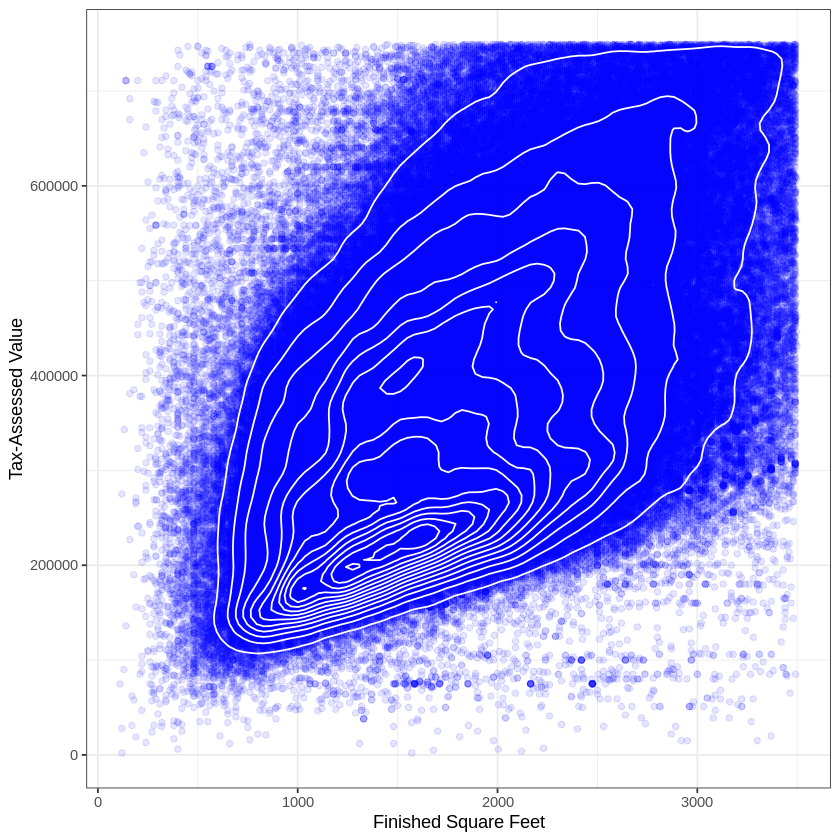

In [ ]:
# We use contours to overlay onto a scatterplot to visualize
# the relationship between two numeric variables
# - a contour band = a specific density of points
graph <- ggplot(kc_tax0, aes(SqFtTotLiving, TaxAssessedValue)) +
  theme_bw() +
  geom_point(color='blue', alpha=0.1) +
  geom_density2d(color='white') +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE)) +
  labs(x='Finished Square Feet', y='Tax-Assessed Value')
graph

# NB:
# - we can see a main peak
# - we can see a secondary peak "north" of the main peak

### *Contingency -- Two categorical variables*

In [ ]:
# Load a new dataset
# - data provided by Lending Club, a leader in peer-to-peer lending business
lc_loans <- read.csv(file.path('sample_data', 'lc_loans.csv'))
dim(lc_loans); head(lc_loans)

[1] 450961      2

,status,grade
,<chr>,<chr>
1,Fully Paid,B
2,Charged Off,C
3,Fully Paid,C
4,Fully Paid,C
5,Current,B
6,Fully Paid,A


In [ ]:
# Contingency table - a table of counts by category
# - we see the contingency table between the grade of a personnal loan and the
# outcome of that loan
x_tab <- CrossTable(lc_loans$grade, lc_loans$status,
                    prop.c=FALSE, prop.chisq=FALSE, prop.t=FALSE)

# NB:
# charged off = the balance of the loan is not expected to be collected
# - high-grade loans have a very low late/charge§off percentage as compare to low-grade loans


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  450961 

 
               | lc_loans$status 
lc_loans$grade | Charged Off |     Current |  Fully Paid |        Late |   Row Total | 
---------------|-------------|-------------|-------------|-------------|-------------|
             A |        1562 |       50051 |       20408 |         469 |       72490 | 
               |       0.022 |       0.690 |       0.282 |       0.006 |       0.161 | 
---------------|-------------|-------------|-------------|-------------|-------------|
             B |        5302 |       93852 |       31160 |        2056 |      132370 | 
               |       0.040 |       0.709 |       0.235 |       0.016 |       0.294 | 
---------------|-------------|-------------|-------------|-------------|-------------|
             C |        6023 |       88928 |       23147 |        2777 |      120875 | 
 

### *Categorical and numeric data*

In [ ]:
# Load a new dataset
# airline_stats: information of flights from various companies (delays...)
airline_stats <- read.csv(file.path('sample_data', 'airline_stats.csv'), stringsAsFactors = FALSE)
dim(airline_stats); head(airline_stats)

[1] 33468     4

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
,<dbl>,<dbl>,<dbl>,<chr>
1,8.153226,1.971774,0.7620968,American
2,5.959924,3.706107,1.5858779,American
3,7.157270,2.706231,2.0267062,American
4,12.100000,11.033333,0.0000000,American
5,7.333333,3.365591,1.7741935,American
6,6.163889,3.225000,0.9750000,American


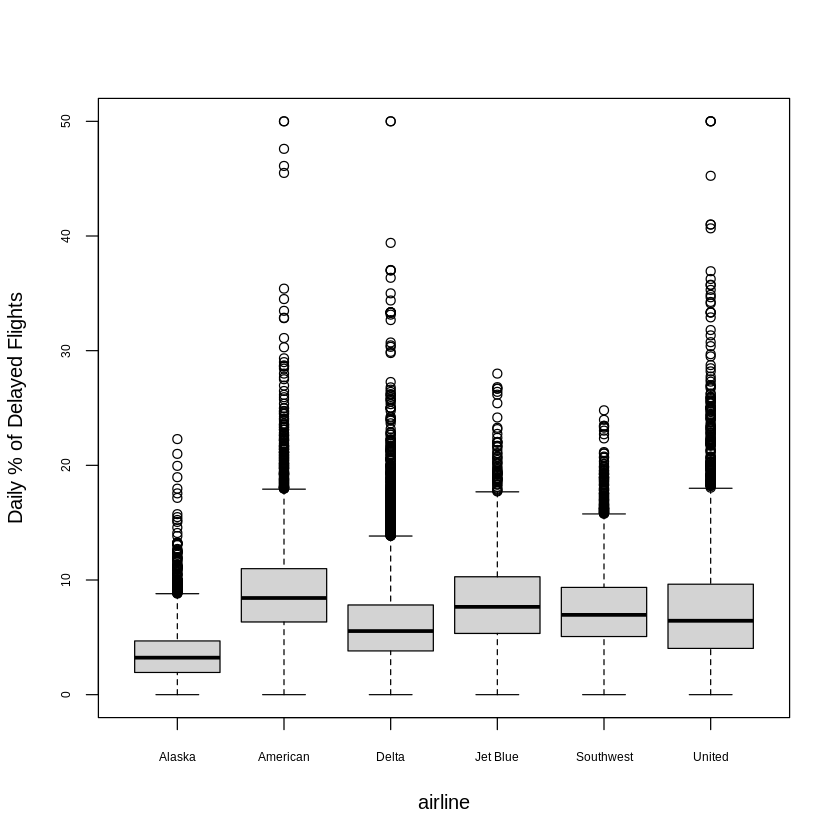

In [ ]:
boxplot(pct_carrier_delay ~ airline, data=airline_stats, ylim=c(0, 50),
        cex.axis=.6, ylab='Daily % of Delayed Flights')

# NB:
# - we can see the percentage of flight in a month that were delayed
# - Alaska has the fewest delays
# - the lower quartile for American is higer than the upper quartile for Alaska

Warning message:
“Removed 28 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 28 rows containing non-finite values (stat_ydensity).”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


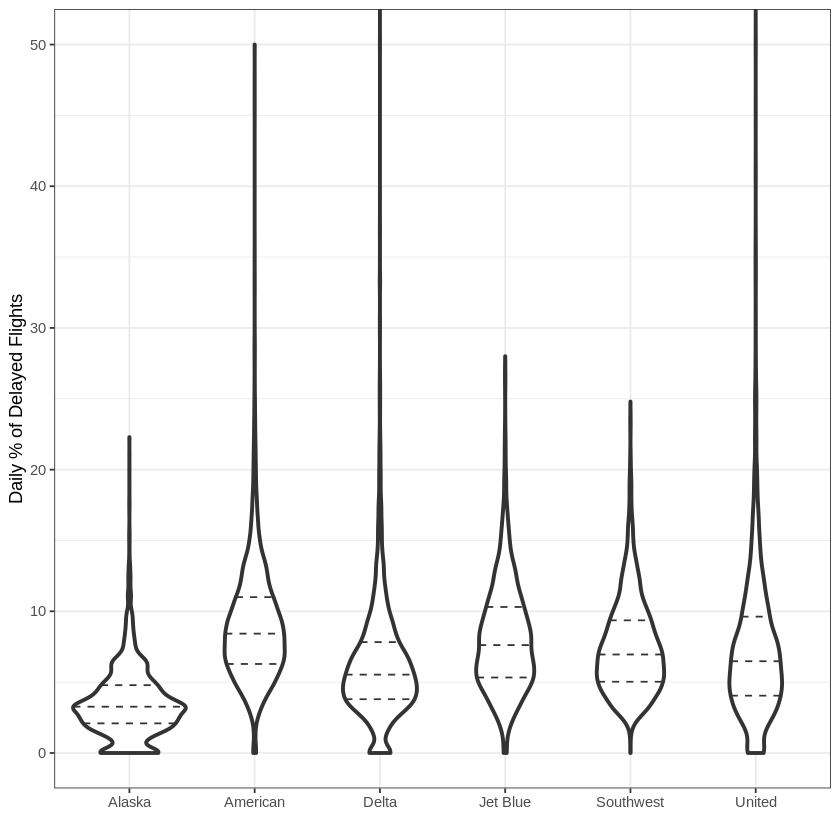

In [ ]:
# The Violin plot plots the density estimate with the density on the y-axis
graph <- ggplot(data=airline_stats, aes(airline, pct_carrier_delay)) +
  geom_violin(draw_quantiles = c(.25,.5,.75), linetype=2) +
  geom_violin(fill=NA, size=1.1) +
  coord_cartesian(ylim=c(0, 50)) +
  labs(x='', y='Daily % of Delayed Flights') +
  theme_bw()
graph

# NB:
# - we can see nuances in the distribution
# - we can not see the outliers

### *Visualizing multiple variables*

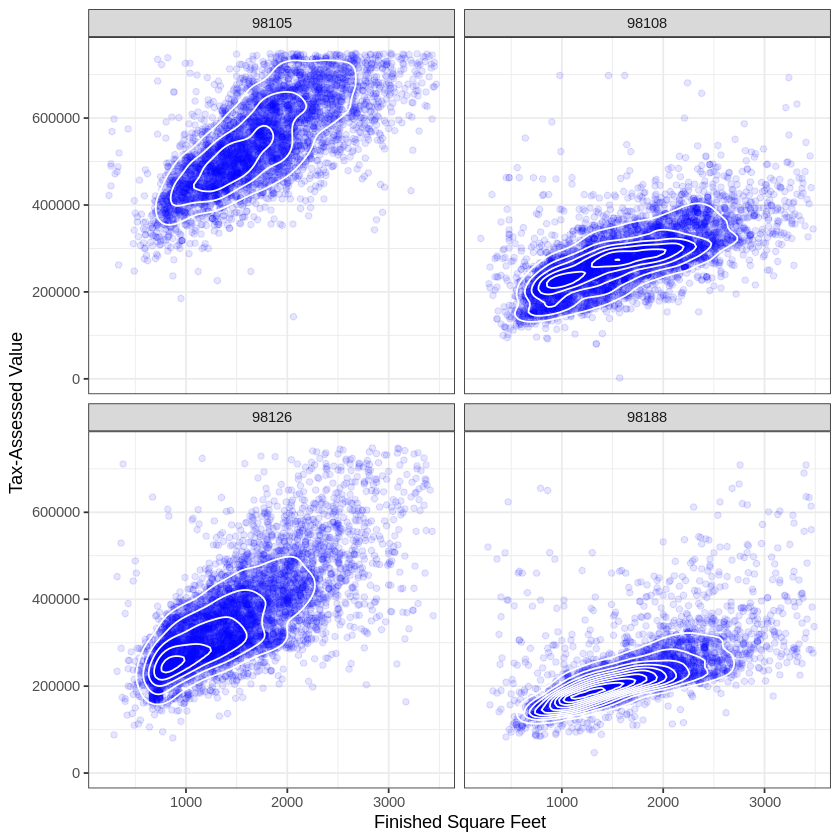

In [ ]:
# Let's see the relationship between homes' finished square feet and their tax-assessed values
graph <- ggplot(subset(kc_tax0, ZipCode %in% c(98188, 98105, 98108, 98126)),
                aes(x=SqFtTotLiving, y=TaxAssessedValue)) +
  theme_bw() +
  geom_point(color='blue', alpha=0.1) +
  geom_density2d(color='white') +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE)) +
  labs(x='Finished Square Feet', y='Tax-Assessed Value') +
  facet_wrap('ZipCode')
graph

# NB:
# - tax-assessed value is much higher in some zip codes (98105, 98126)